In [1]:
import matplotlib.pyplot as plt
import configparser
from PIL import Image
import pandas as pd
import seaborn as sns
from data_util import process_data

config = configparser.ConfigParser()
config.read("../config.ini")

['../config.ini']

In [2]:
data = pd.read_csv(config['chexpert']['labels'])
data = process_data(data, dataset_name='chexpert')
data

,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices,Patient ID
4,/Users/dilermando/dev/Fairness/data/dataset/ch...,Male,41,Frontal,AP,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,patient00003
11,/Users/dilermando/dev/Fairness/data/dataset/ch...,Female,42,Frontal,AP,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,patient00006
13,/Users/dilermando/dev/Fairness/data/dataset/ch...,Male,69,Frontal,AP,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,1.0,0.0,0.0,NaN,0.0,1.0,patient00007
15,/Users/dilermando/dev/Fairness/data/dataset/ch...,Male,81,Frontal,AP,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,0.0,1.0,NaN,NaN,1.0,patient00008
45,/Users/dilermando/dev/Fairness/data/dataset/ch...,Female,76,Frontal,AP,NaN,NaN,NaN,-1.0,NaN,1.0,-1.0,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,patient00015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223406,/Users/dilermando/dev/Fairness/data/dataset/ch...,Male,60,Frontal,AP,NaN,NaN,NaN,1.0,NaN,NaN,-1.0,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,patient64535
223408,/Users/dilermando/dev/Fairness/data/dataset/ch...,Female,61,Frontal,AP,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,patient64536
223410,/Users/dilermando/dev/Fairness/data/dataset/ch...,Male,59,Frontal,AP,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,0.0,-1.0,NaN,-1.0,NaN,NaN,NaN,patient64537
223411,/Users/dilermando/dev/Fairness/data/dataset/ch...,Female,0,Frontal,AP,NaN,NaN,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,patient64538


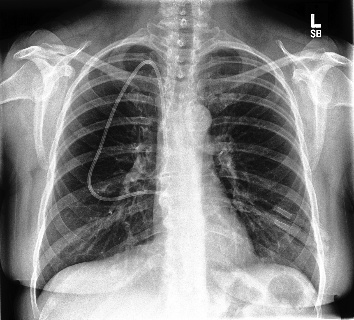

In [15]:
image = Image.open(f"{config['chexpert']['data_dir']}/{data['Path'].iloc[10]}")
image

<Axes: ylabel='count'>

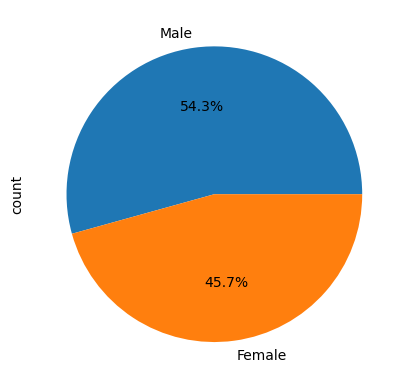

In [4]:
data['Sex'].value_counts().plot.pie(autopct='%1.1f%%')

/opt/homebrew/Caskroom/miniconda/base/envs/fairness/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniconda/base/envs/fairness/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniconda/base/envs/fairness/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniconda/base/envs/fairness/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarni

Text(0.5, 0, 'Patient Age')

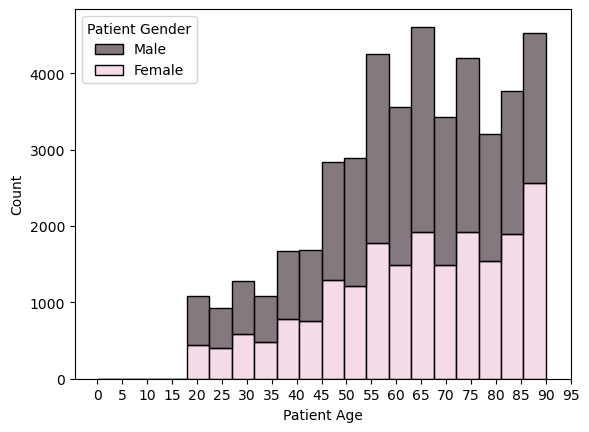

In [14]:
sex_map = {'Female': 'Female', 'Male': 'Male'}
data['Patient Gender'] = data['Sex'].map(sex_map)

ax = sns.histplot(
    data,
    x="Age", hue="Patient Gender",
    multiple="stack",
    palette=['#594C53', '#F2CEE2'],
    bins=20
)
ax.set_xticks(range(0, 100, 5))
plt.xlabel('Patient Age')